In [10]:
import os
os.chdir('/Users/johnnyxcy/Workspace/OpenSource/PyTrail/pytrial')

In [ ]:
from pytrial.tasks.trial_simulation.data import TabularPatient

In [15]:
import pandas as pd

df = pd.read_csv("./site/warfarin_dat.csv")
df = df[["sex", "age", "wt"]]
df

,sex,age,wt
0,1,50,66.7
1,1,50,66.7
2,1,50,66.7
3,1,50,66.7
4,1,50,66.7
...,...,...,...
510,1,21,62.0
511,1,21,62.0
512,1,21,62.0
513,1,21,62.0


In [16]:
transformed_data = TabularPatient(df, metadata={
    'sdtypes':{
        'sex': 'categorical',
    }
})

In [42]:
from pytrial.tasks.trial_simulation.tabular import CopulaGAN, GaussianCopula

In [44]:
model = GaussianCopula()

In [45]:
model.fit(transformed_data)

In [46]:
synthetic_data = model.predict(n=10000) 

In [47]:
synthetic_data

,sex,age,wt
0,1,27,79.289704
1,1,27,75.934872
2,1,31,63.560550
3,1,63,80.624661
4,0,22,65.010317
...,...,...,...
9995,0,31,62.793799
9996,1,31,63.809753
9997,1,31,72.069590
9998,1,27,73.886287


In [56]:
import seaborn as sns

<Axes: xlabel='wt', ylabel='Count'>

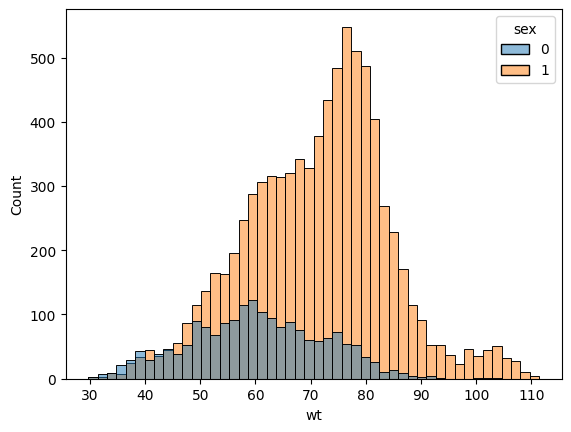

In [54]:
sns.histplot(data=synthetic_data, x="wt", hue="sex")

<Axes: xlabel='wt', ylabel='Count'>

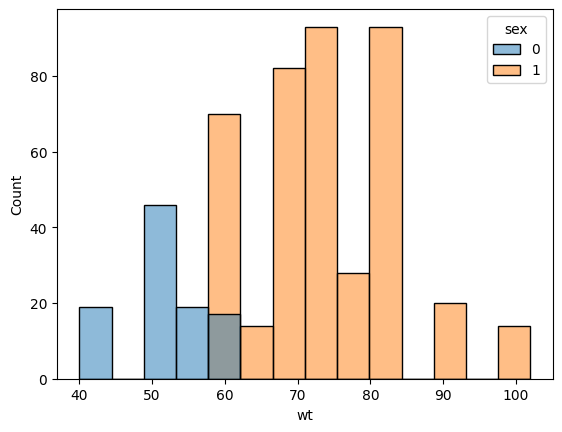

In [55]:
sns.histplot(data=df, x="wt", hue="sex")

In [57]:
from pytrial.tasks.trial_simulation.tabular.evaluation import evaluate

In [61]:
evaluate(synthetic_data, df, metrics=['LogisticDetection', 'SVCDetection'], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,LogisticDetection,LogisticRegression Detection,1.000000,1.000000,0.0,1.0,MAXIMIZE,None
1,SVCDetection,SVC Detection,0.522694,0.522694,0.0,1.0,MAXIMIZE,None
